In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import h2o

In [3]:
# load the cleaned dataset
df = pd.read_csv("MMF-ML-main/cleaned_train.csv", index_col=0)

# drop ID and target variable
X = df.drop(columns=["SK_ID_CURR", "TARGET"])

# drop constant columns
X = X.drop(columns=['FLAG_DOCUMENT_10', 'NAME_INCOME_TYPE_Businessman', 'FLAG_DOCUMENT_12', 'NAME_INCOME_TYPE_Student', 'FLAG_MOBIL'])

# drop demographic features (most of them have already been dropped during data preprocessing anyways)
X = X.drop(columns=['DAYS_BIRTH'])

# separate target variable
y = df["TARGET"]

# 8:2 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2030)

In [4]:
# initialize H2O instance
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /home/josh/sr-ai/data-science/esg-models/venv/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxglasdny
  JVM stdout: /tmp/tmpxglasdny/h2o_josh_started_from_python.out
  JVM stderr: /tmp/tmpxglasdny/h2o_josh_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_josh_u1x5mn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.97 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [5]:
# set up H2O dataframe objects
train_hf = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
train_hf["TARGET"] = train_hf["TARGET"].asfactor()
test_hf = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))
test_hf["TARGET"] = test_hf["TARGET"].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
# train using AutoML
aml = h2o.automl.H2OAutoML(max_models=20, seed=2030, balance_classes=True, exclude_algos=["DeepLearning", "StackedEnsemble"])
aml.train(training_frame=train_hf, y="TARGET")

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20230115_25901_model_2


Model Summary: 
    number_of_trees
--  -----------------
    76

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.06663108269737202
RMSE: 0.2581299724893876
LogLoss: 0.24099730469222644
Mean Per-Class Error: 0.32825365492009695
AUC: 0.7746484006294053
AUCPR: 0.269604371029912
Gini: 0.5492968012588106

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14266313870918063
       0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      198338  27810  0.123    (27810.0/226148.0)
1      10596   9264   0.5335   (10596.0/19860.0)
Total  208934  37074  0.1561   (38406.0/246008.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.142663     0.325429  210
max f2                       0.0855223    0.436792  271
max f0point5                 0.23353      0.321062  143
max accuracy                 0.468617     0.920177  48
max precision                0.939637     1         0
max recall                   0.00390638   1         399
max specificity              0.939637     1         0
max absolute_mcc             0.141379     0.26164   211
max min_per_class_accuracy   0.0809097    0.702938  277
max mean_per_class_accuracy  0.0763788    0.704111  283
max tns                      0.939637     226148    0
max fns                      0.939637     19859     0
max fps                      0.00390638   226148    399
max tps                      0.00390638   19860     399
max tnr                      0.939637     1         0
max fnr                      0.939637     0.99995   0
max fpr                      0.00390638   1         399
max tpr                      0.00390638   1         399

Gains/Lift Table: Avg response rate:  8.07 %, avg score:  8.08 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100037                   0.399948           6.48297   6.48297            0.523364         0.485801   0.523364                    0.485801            0.064854        0.064854                   548.297   548.297            0.0596671
2        0.0200034                   0.333717           4.82896   5.65613            0.389837         0.362871   0.456615                    0.424348            0.048288        0.113142                   382.896   465.613            0.101318
3        0.0300031                   0.294557           4.12904   5.14717            0.333333         0.312392   0.415526                    0.387034            0.041289        0.154431                   312.904   414.717            0.135355
4        0.0400028                   0.26604            3.66578   4.77686            0.295935         0.279698   0.385632                    0.360203            0.0366566       0.191088                   266.578   377.686            0.164353
5        0.0500024                   0.244216           3.02628   4.42677            0.244309         0.25473    0.357369                    0.33911             0.0302618       0.221349                   202.628   342.677            0.186394
6        0.100001                    0.178369           2.72315   3.575              0.219837         0.207087   0.288606                    0.273101            0.136153        0.357503                   172.315   257.5              0.280115
7        0.150003                    0.142517       

In [7]:
lb = h2o.automl.get_leaderboard(aml, extra_columns="ALL")
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_1_20230115_25901_model_2,0.75828,0.246155,0.24282,0.342773,0.260449,0.0678337,6299,0.00394,XGBoost
XGBoost_grid_1_AutoML_1_20230115_25901_model_3,0.758189,0.56962,0.241316,0.345193,0.440093,0.193682,10186,0.002828,XGBoost
GBM_grid_1_AutoML_1_20230115_25901_model_1,0.757451,0.246905,0.242223,0.350617,0.260846,0.0680405,76174,0.005903,GBM
GBM_5_AutoML_1_20230115_25901,0.757261,0.246871,0.242427,0.346906,0.260851,0.0680432,48857,0.005888,GBM
GBM_2_AutoML_1_20230115_25901,0.755971,0.247438,0.240955,0.336717,0.261024,0.0681333,27794,0.005373,GBM
XGBoost_grid_1_AutoML_1_20230115_25901_model_5,0.755903,0.247282,0.238777,0.350296,0.261063,0.0681539,7132,0.003757,XGBoost
GBM_grid_1_AutoML_1_20230115_25901_model_3,0.753682,0.248757,0.238013,0.342467,0.261534,0.0684001,54374,0.005902,GBM
XGBoost_grid_1_AutoML_1_20230115_25901_model_4,0.752668,0.248433,0.235466,0.351078,0.261499,0.0683817,8123,0.00393,XGBoost
GBM_3_AutoML_1_20230115_25901,0.752406,0.249061,0.237185,0.353392,0.261622,0.068446,26985,0.005617,GBM
GBM_4_AutoML_1_20230115_25901,0.742703,0.253573,0.22656,0.36015,0.263146,0.0692459,26001,0.004268,GBM


In [ ]:
best_model = aml.get_best_model()
model_path = h2o.save_model(model=best_model, path="models", force=True)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_1_20230115_25901_model_6,0.999971,0.0622087,0.999481,0.00224197,0.104718,0.0109659,28731,0.009647,XGBoost
XGBoost_1_AutoML_1_20230115_25901,0.999934,0.0686051,0.999081,0.00316429,0.111925,0.0125272,24554,0.01055,XGBoost
XGBoost_2_AutoML_1_20230115_25901,0.999502,0.0939477,0.993741,0.0163831,0.144808,0.0209693,52856,0.015586,XGBoost
DRF_1_AutoML_1_20230115_25901,0.989571,0.161017,0.900998,0.0906003,0.226128,0.051134,78714,0.007147,DRF
XGBoost_3_AutoML_1_20230115_25901,0.984837,0.23816,0.838838,0.108528,0.262665,0.068993,293560,0.023024,XGBoost
GBM_grid_1_AutoML_1_20230115_25901_model_2,0.966162,0.188641,0.721231,0.153734,0.240961,0.0580621,47458,0.003978,GBM
GBM_1_AutoML_1_20230115_25901,0.960198,0.183653,0.682416,0.166746,0.238,0.0566438,41116,0.00484,GBM
XRT_1_AutoML_1_20230115_25901,0.948779,0.227002,0.571703,0.178976,0.259989,0.0675944,240041,0.007394,DRF
XGBoost_grid_1_AutoML_1_20230115_25901_model_1,0.933703,0.169254,0.682872,0.205456,0.217551,0.0473284,7471,0.003827,XGBoost
GBM_4_AutoML_1_20230115_25901,0.901039,0.207477,0.459707,0.249737,0.2474,0.0612068,26001,0.004277,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid_1_AutoML_1_20230115_25901_model_2

,0,1,Error,Rate
0,198338.0,27810.0,0.123,(27810.0/226148.0)
1,10596.0,9264.0,0.5335,(10596.0/19860.0)
Total,208934.0,37074.0,0.1561,(38406.0/246008.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

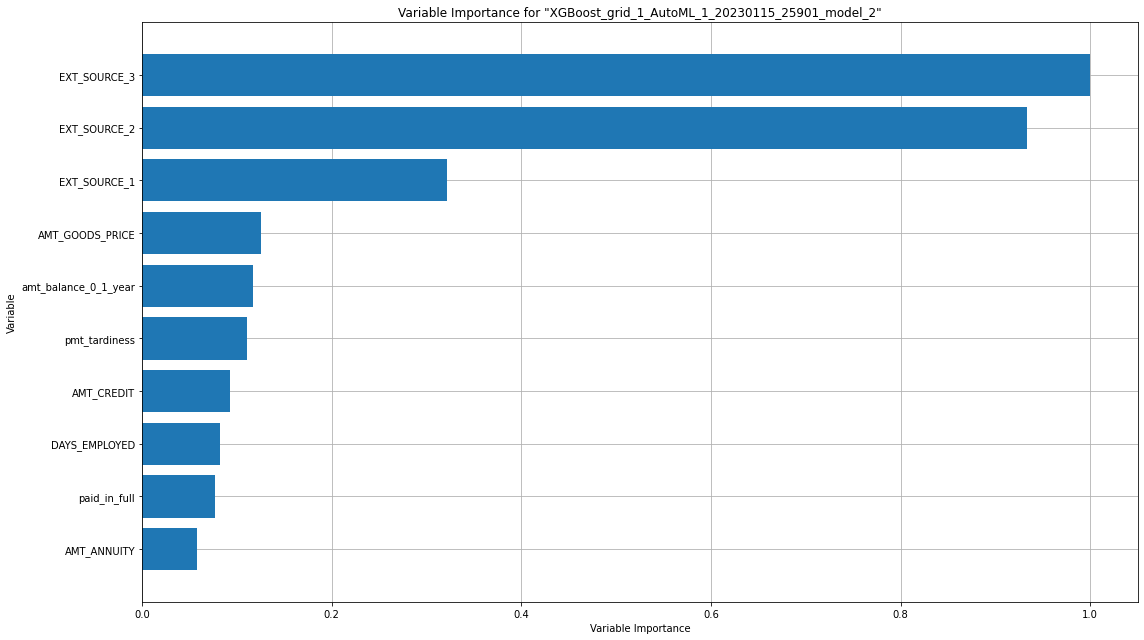

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

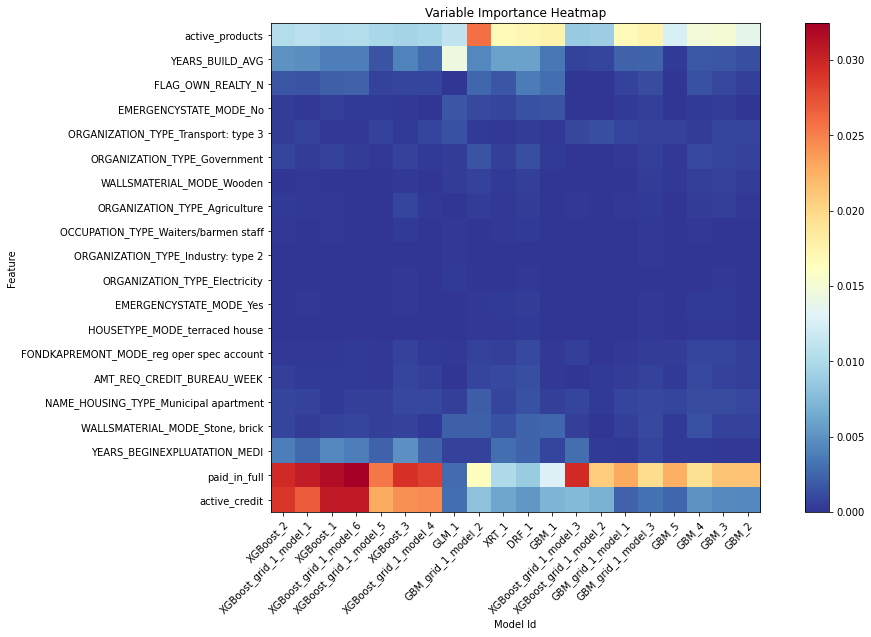

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

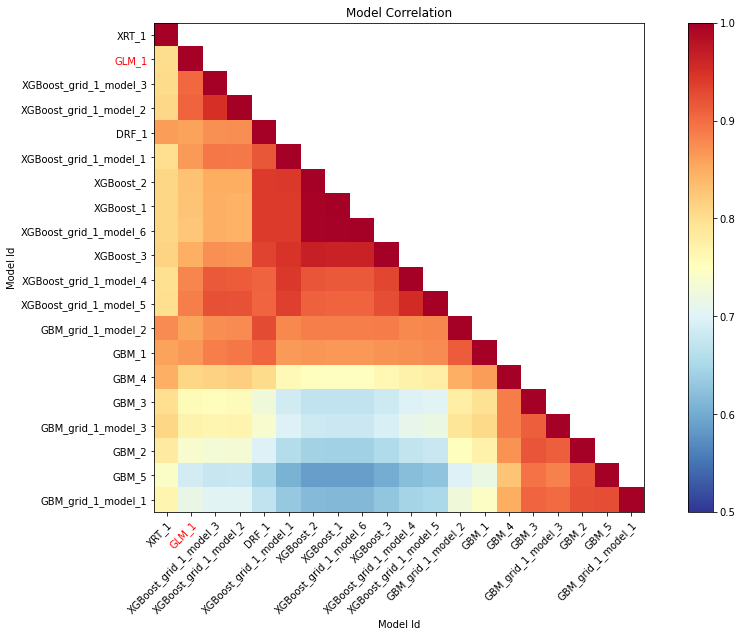

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

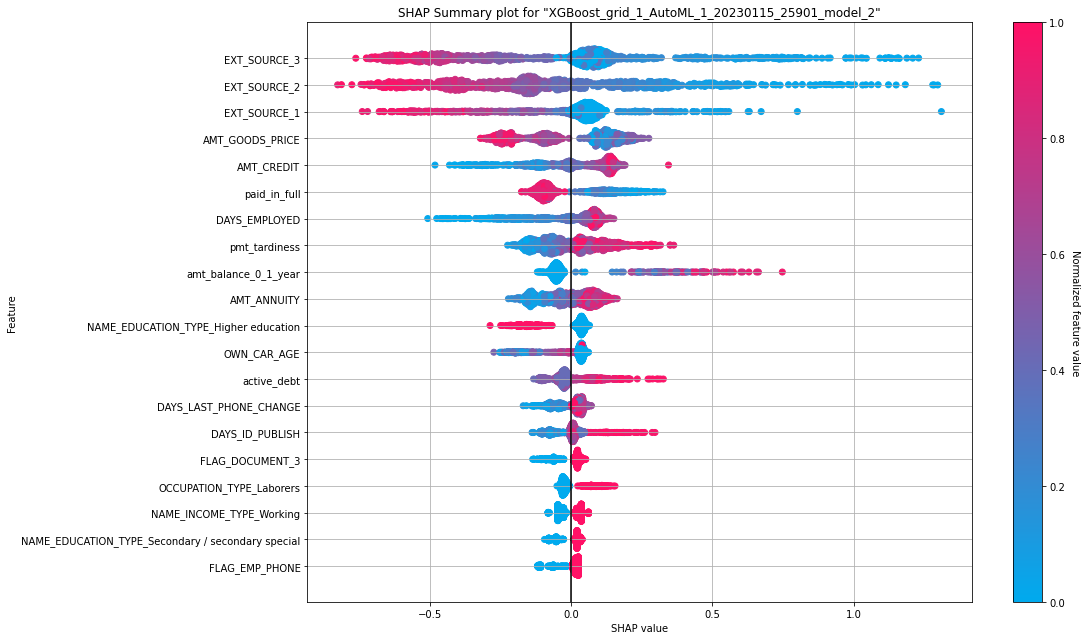

In [21]:
exa_train = aml.explain(train_hf, exclude_explanations=["pdp"])

In [20]:
perf = best_model.model_performance(test_hf)
perf

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06774176940048147
RMSE: 0.26027249067176017
LogLoss: 0.2448170060170947
Mean Per-Class Error: 0.3482334903167551
AUC: 0.7650893087011821
AUCPR: 0.24215181979556827
Gini: 0.5301786174023642

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15395155390806958
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      50321  6217  0.11     (6217.0/56538.0)
1      2912   2053  0.5865   (2912.0/4965.0)
Total  53233  8270  0.1484   (9129.0/61503.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.153952     0.310238  194
max f2                       0.0783885    0.431106  278
max f0point5                 0.257105     0.296175  121
max accuracy                 0.610696     0.919516  17
max precision                0.892033     1         0
max recall                   0.00759276   1         396
max specificity              0.892033     1         0
max absolute_mcc             0.134527     0.244013  212
max min_per_class_accuracy   0.0804074    0.696682  275
max mean_per_class_accuracy  0.0761614    0.700568  281
max tns                      0.892033     56538     0
max fns                      0.892033     4964      0
max fps                      0.00394934   56538     399
max tps                      0.00759276   4965      396
max tnr                      0.892033     1         0
max fnr                      0.892033     0.999799  0
max fpr                      0.00394934   1         399
max tpr                      0.00759276   1         396

Gains/Lift Table: Avg response rate:  8.07 %, avg score:  8.10 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100158                   0.40024            5.57027   5.57027            0.449675         0.486366   0.449675                    0.486366            0.0557905       0.0557905                  457.027   457.027            0.0497946
2        0.0200153                   0.333818           4.16939   4.8704             0.336585         0.361798   0.393176                    0.424133            0.0416918       0.0974824                  316.939   387.04             0.08427
3        0.0300148                   0.294181           3.98811   4.57646            0.321951         0.312263   0.369447                    0.386863            0.0398792       0.137362                   298.811   357.646            0.116774
4        0.0400143                   0.26518            3.82697   4.38917            0.308943         0.278986   0.354328                    0.359905            0.0382679       0.175629                   282.697   338.917            0.147524
5        0.0500138                   0.243691           2.77959   4.06736            0.22439          0.254052   0.328349                    0.338741            0.0277946       0.203424                   177.959   306.736            0.166882
6        0.100011                    0.179144           2.71514   3.39136            0.219187         0.207268   0.273777                    0.273015            0.13575         0.339174                   171.514   239.136            0.260165
7        0.150009                    0.143806           2.07462   2.95249            0.16748          0.160145   0.238348                    0.235396            0.103726        0.4429                     107.462   195.249            0.318612
8        0.20

In [ ]:
# test performance on the training set threshold
pred_hf = best_model.predict(test_hf)
print(f"accuracy = ", accuracy_score(test_hf.as_data_frame()["TARGET"], pred_hf.as_data_frame()["predict"]))
print(f"F1 score = ", f1_score(test_hf.as_data_frame()["TARGET"], pred_hf.as_data_frame()["predict"]))
print(f"precision = ", precision_score(test_hf.as_data_frame()["TARGET"], pred_hf.as_data_frame()["predict"]))
print(f"recall = ", recall_score(test_hf.as_data_frame()["TARGET"], pred_hf.as_data_frame()["predict"]))